# Prevendo a Diabetes com Multi Layer Perceptron

Este trabalho tem como sua base o segundo capítulo do livro [Neural Network Projects with Python](https://www.amazon.com.br/Neural-Network-Projects-Python-James/dp/1789138906). Neste capítulo o autor usa o James Loy mostra como usar a biblioteca [Keras](https://keras.io/) para criar um Multi Layer Perceptron com intuito de prever pacientes que possam ou não desenvolver diabetes do famoso dataset [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

Neste notebook você podera encontrar algumas diferenças do encontrado no livro ou mesmo no [repósitorio](https://github.com/PacktPublishing/Neural-Network-Projects-with-Python/tree/master/Chapter02) do livro do autor, como por exemplo a parte de análise exploratória um pouco mais extensa, feature engineering e otimização da rede neural criada para resolver o problema de classificação do dataset.

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo de gráfico utilizado
%matplotlib inline
plt.rcParams["figure.figsize"] = 20, 12
plt.style.use('fivethirtyeight')
sns.set_palette('gist_ncar')

# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando o dataset
df = pd.read_csv('Data/diabetes.csv')

In [3]:
# Checando as primeiras linhas do dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Cheacando as informações sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


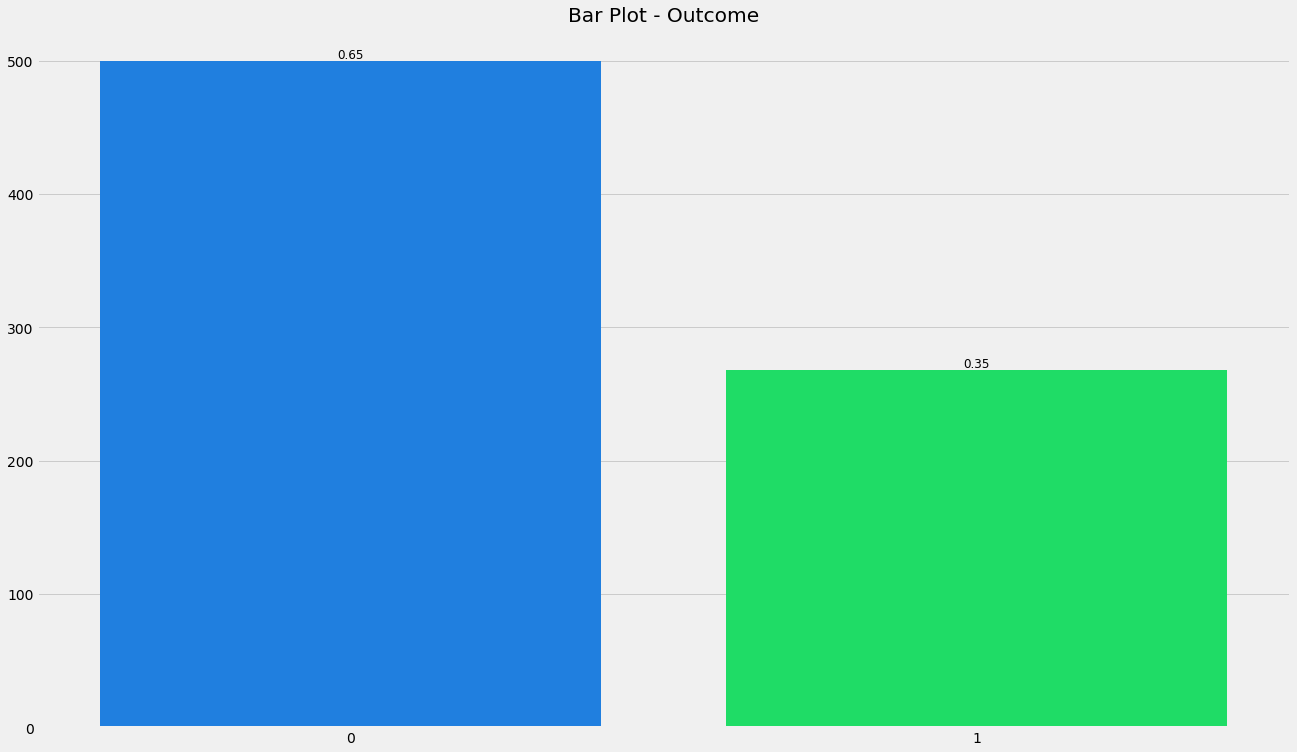

In [5]:
# Cria o novo gráfico de barras da variável alvo
ax = sns.barplot(x=df['Outcome'].value_counts().index, 
                 y=df['Outcome'].value_counts().values,
                 data=df)

total = float(len(df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, '{:1.2f}'.format(height/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Bar Plot - Outcome')
plt.show()

In [6]:
quant_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [47]:
df[quant_cols].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


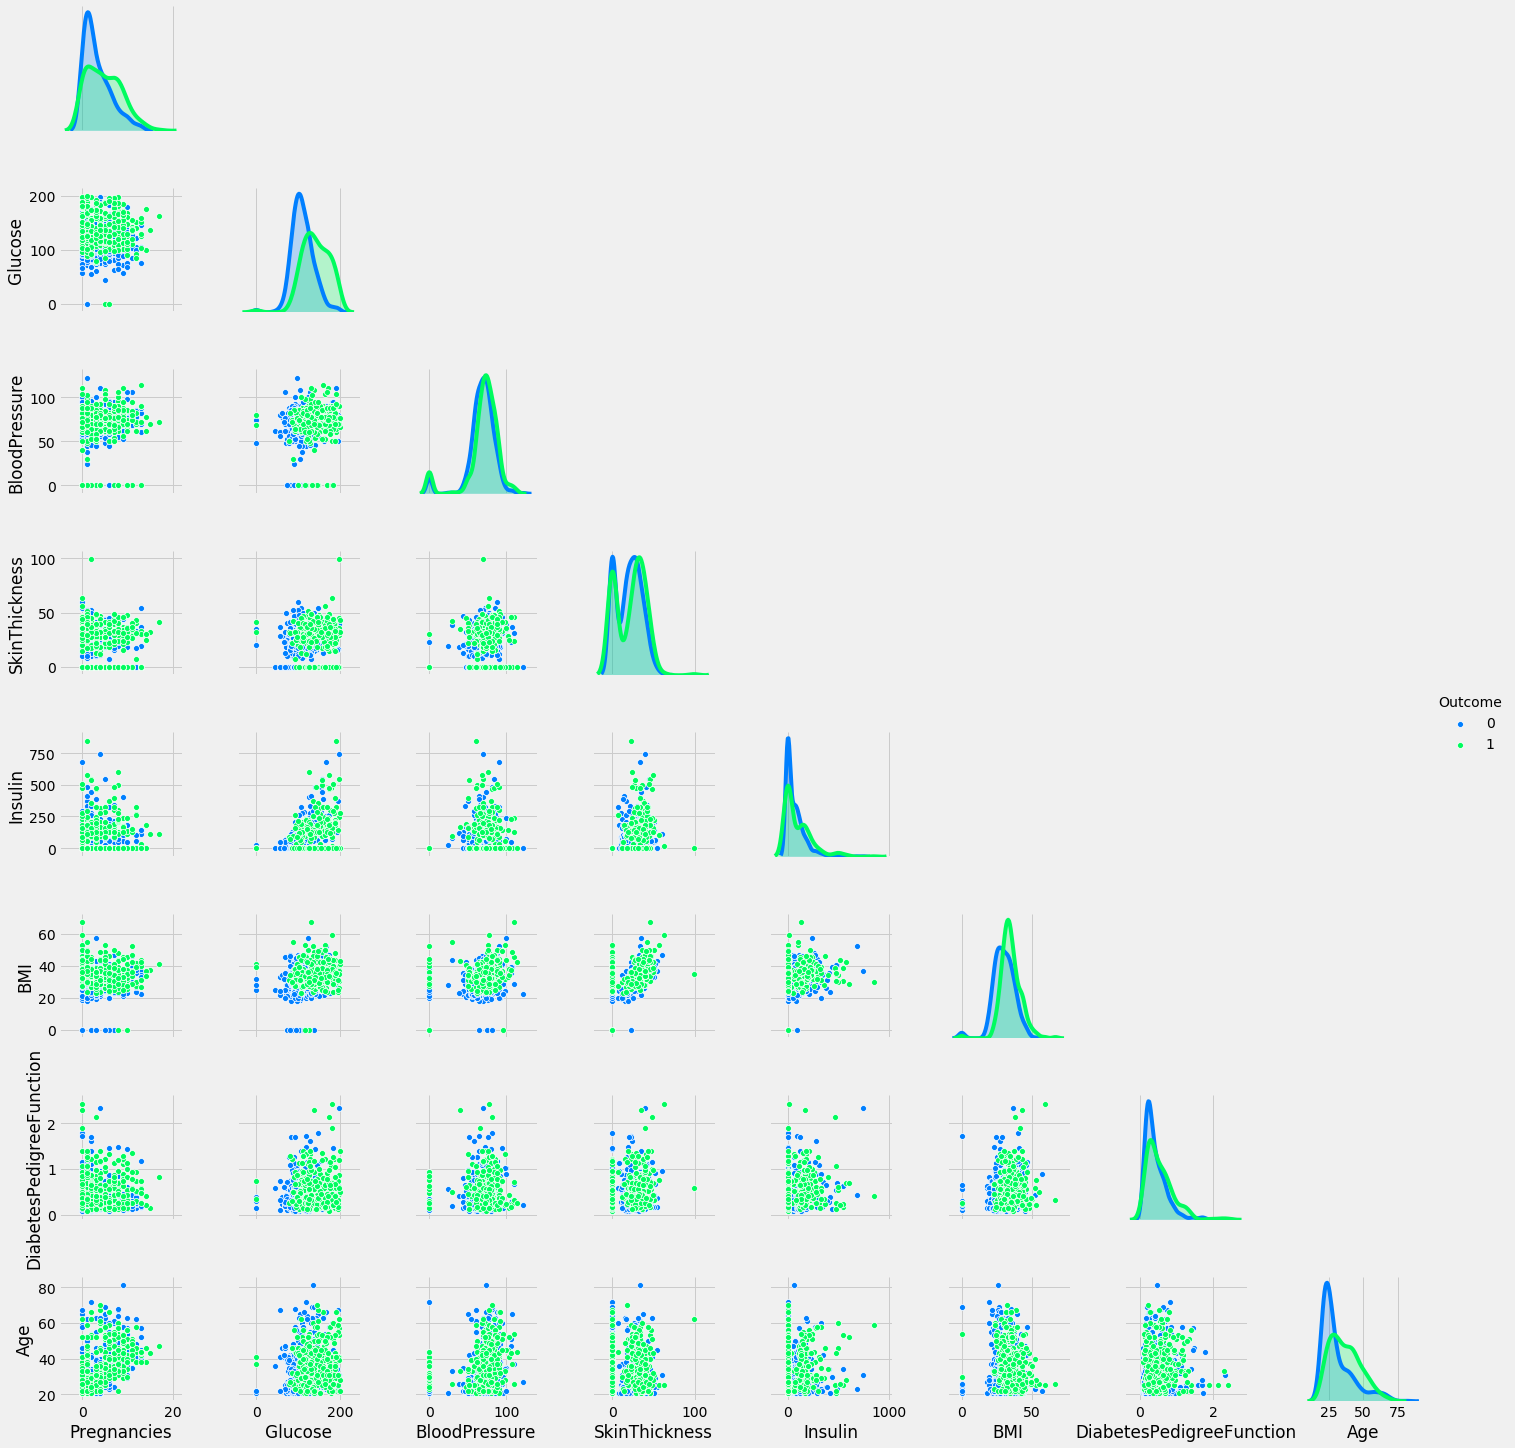

In [7]:
# Visualizando as relações entre as variáveis quantitativas através de gráfico dispersão
sns.pairplot(df, 
             vars=df[quant_cols], 
             diag_kind='kde',
             hue='Outcome',
             corner=True)

# Mostra o gráfico
plt.show()

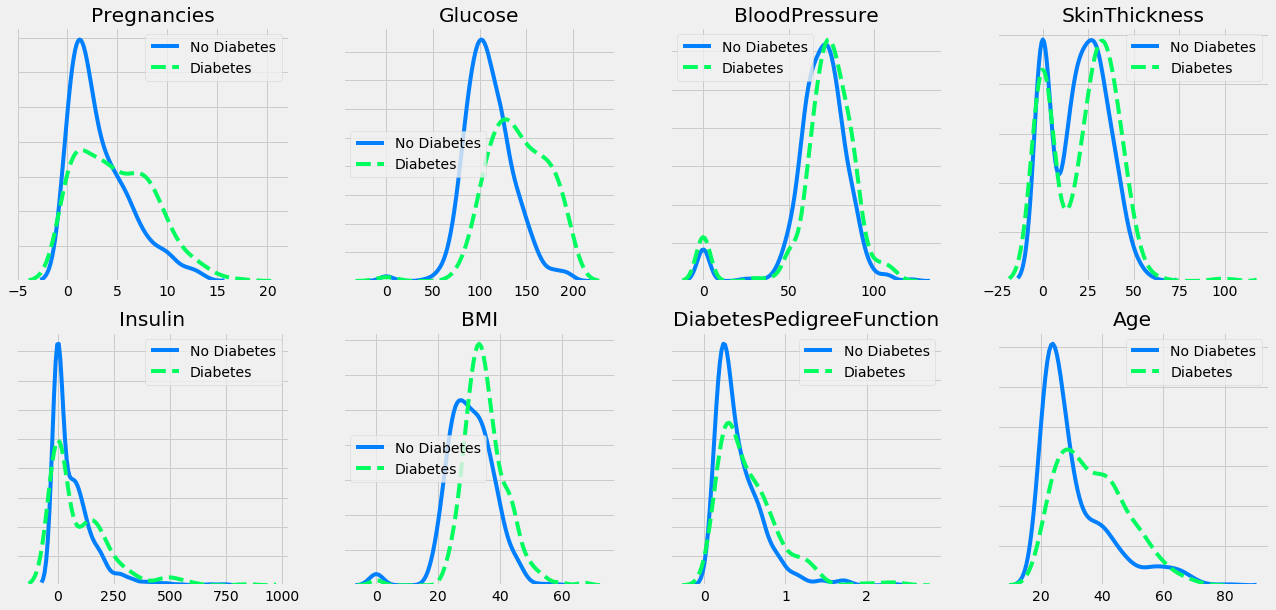

In [26]:
# Cria um subplot de dimensões 3 x 3
plt.figure(figsize=(20,20))

# Plota um gráfico de densidade para cada variável segmentados por com e sem diabetes
for idx, col in enumerate(df[quant_cols]):
    ax = plt.subplot(4,4,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-', 
             'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
             'label':"Diabetes"})
    ax.set_title(col)

# Mostra o gráfico
plt.show()

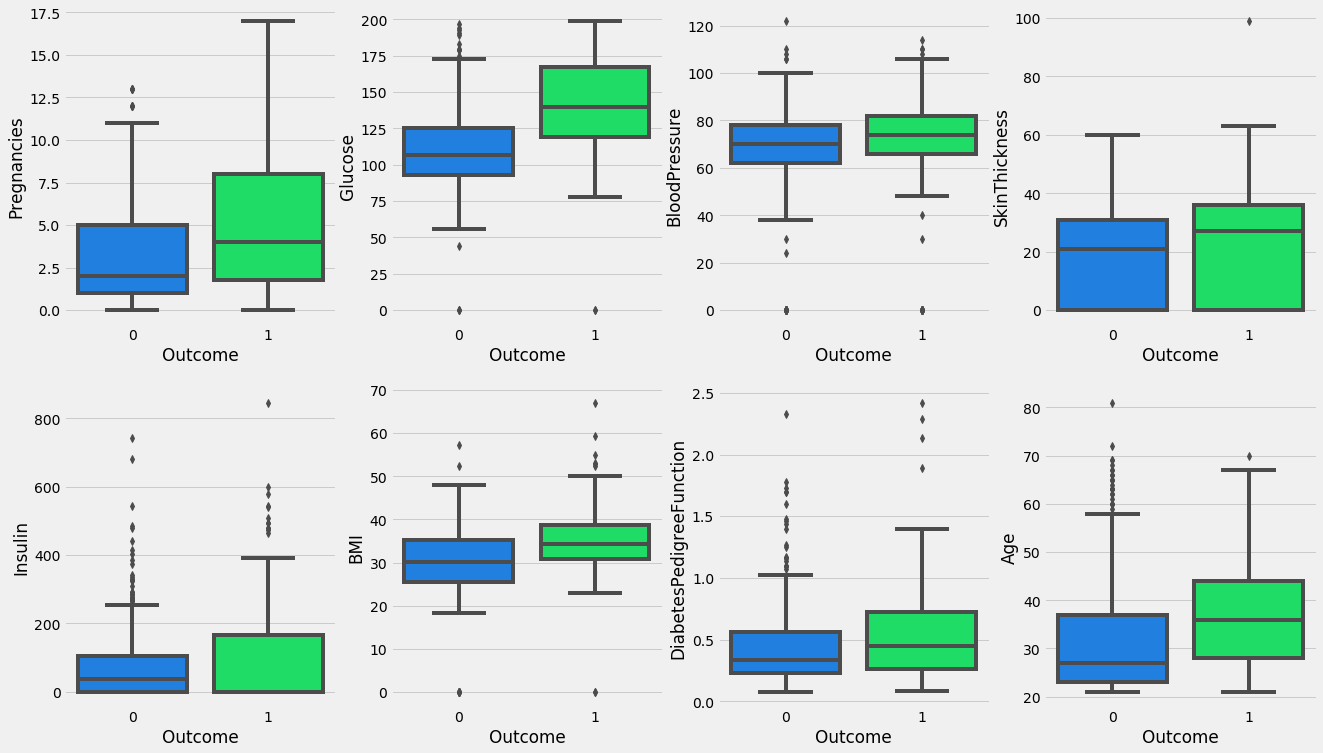

In [36]:
# Conjunto de box-plots das variáveis quantitativas
fig, axes = plt.subplots(2, 4)
axes = axes.flatten()

# Itera sobre as variáveis quantitativas para gerar o box plot
for ax, box in zip(axes, df[quant_cols]):
    sns.boxplot(x='Outcome',
                y=box, 
                ax=ax,
                data=df)

# Mostra o gráfico
plt.show()

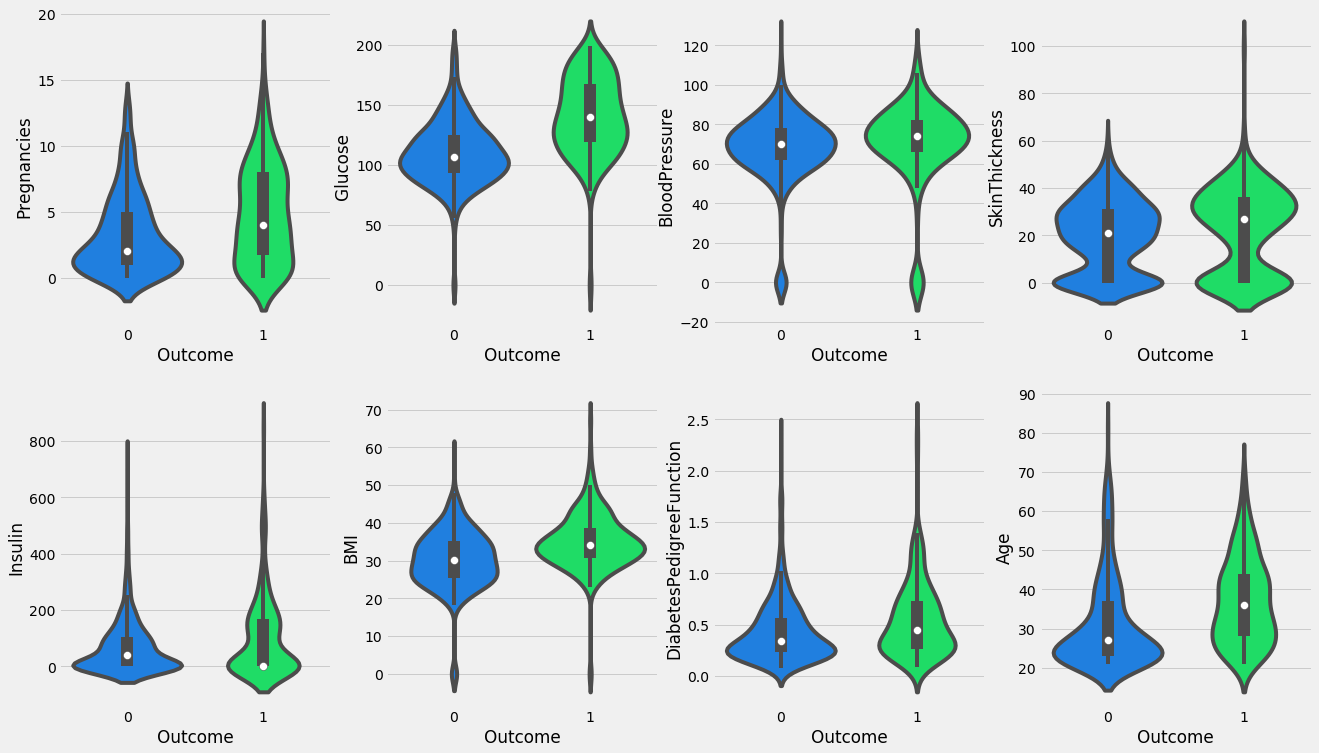

In [43]:
# Conjunto de box-plots das variáveis quantitativas
fig, axes = plt.subplots(2, 4)
axes = axes.flatten()

# Itera sobre as variáveis quantitativas para gerar o violin plot
for ax, violin in zip(axes, df[quant_cols]):
    sns.violinplot(x='Outcome',
                   y=violin, 
                   ax=ax,
                   split=True,
                   data=df)

# Mostra o gráfico
plt.show()

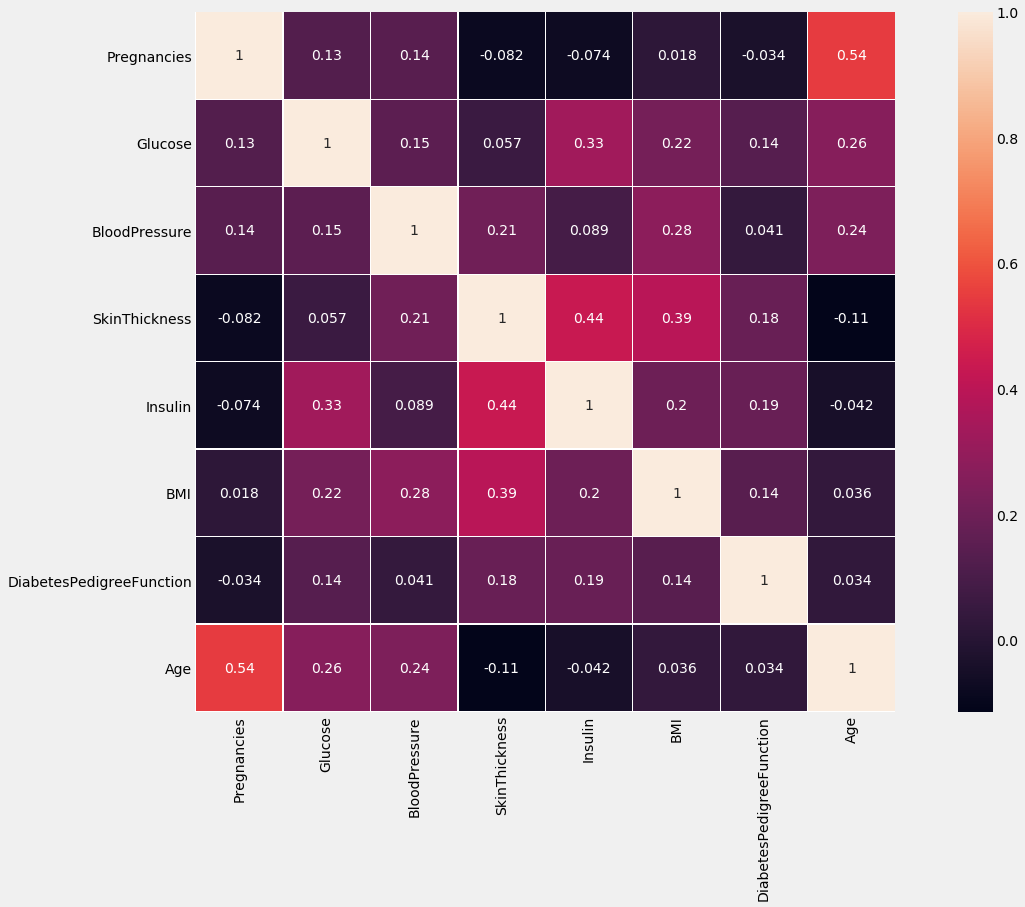

In [48]:
# Cria uma matrix de correlação dos atributos quantitativos
sns.heatmap(df[quant_cols].corr(method='pearson'), 
            annot=True, 
            linewidths=0.3, 
            square=True)

# Mostra o gráfico
plt.show()